Mounted at /content/drive
Training set shape: (1372, 10)
Test set shape: (344, 10)
Random Forest Model Accuracy: 0.938953488372093
Random Forest Classification Report:
              precision    recall  f1-score   support

          -1       0.95      0.94      0.94       186
           1       0.93      0.94      0.93       158

    accuracy                           0.94       344
   macro avg       0.94      0.94      0.94       344
weighted avg       0.94      0.94      0.94       344



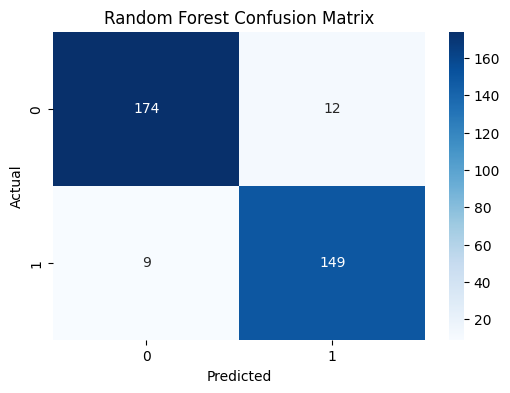

Epoch 1/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.2707 - loss: 0.6331 - val_accuracy: 0.2936 - val_loss: 0.3503
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2982 - loss: 0.2539 - val_accuracy: 0.3110 - val_loss: -0.1151
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3093 - loss: -0.2133 - val_accuracy: 0.3198 - val_loss: -0.7449
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2959 - loss: -0.9280 - val_accuracy: 0.3314 - val_loss: -1.5653
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3122 - loss: -1.8836 - val_accuracy: 0.3372 - val_loss: -2.5903
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3263 - loss: -2.8143 - val_accuracy: 0.3459 - val_loss: -3.8211
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3131 - loss: -4.5217 - val_accuracy: 0.3576 - val_loss: -5.2901
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3238 - loss: -5.8201 - val_accuracy: 0.360

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

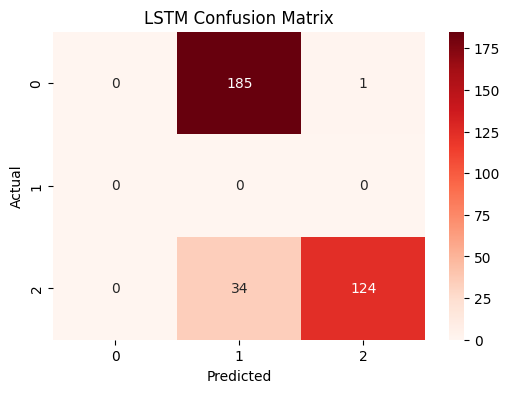

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


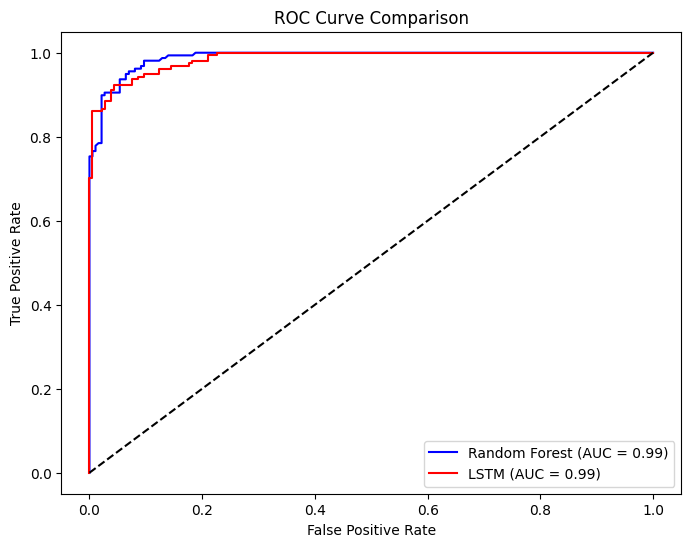

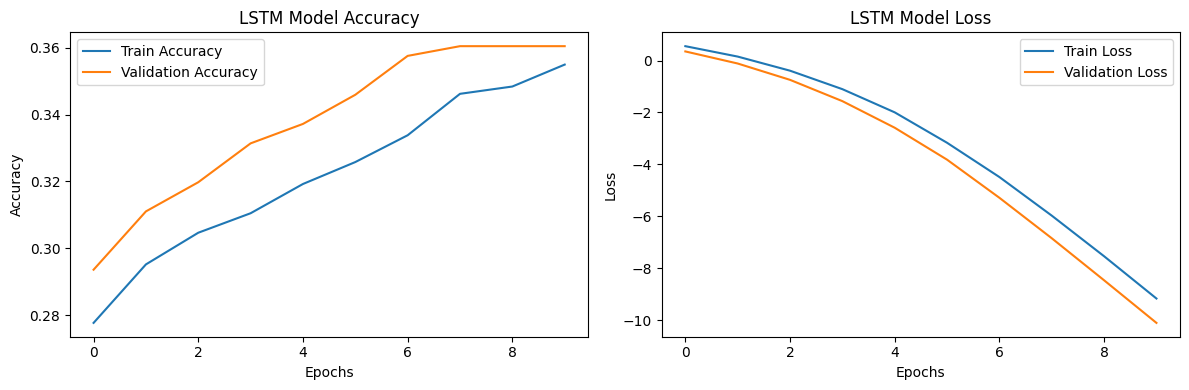

In [1]:
import os
import pandas as pd
import numpy as np
from scipy.io import arff
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

#-------------------------------
# Step 0: Mount Google Drive in Colab
#-------------------------------
from google.colab import drive
drive.mount('/content/drive')

#-------------------------------
# Step 1: Load and Preprocess the Data
#-------------------------------
# Define file path in Google Drive (update folder and file name as needed)
file_path = "/content/drive/My Drive/old.arff"

# Load the dataset
data, meta = arff.loadarff(file_path)
df = pd.DataFrame(data)

# Convert binary class labels from bytes to integers
df['Result'] = df['Result'].apply(lambda x: int(x))

# Remove missing values and duplicates
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

# Split features and labels
X = df.drop(columns=['Result'])
y = df['Result']

# Normalize the numerical data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Feature Selection using PCA (reduce to 10 principal components)
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

#-------------------------------
# Step 2: Classic ML Model - Random Forest
#-------------------------------
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions with Random Forest
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
print("Random Forest Model Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix for Random Forest
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Compute ROC curve for Random Forest
# Note: For binary classification, we assume positive class is at index 1.
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

#-------------------------------
# Step 3: Deep Learning Model - LSTM
#-------------------------------
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input

# Reshape data for LSTM: [samples, timesteps, features]
# Here we treat each row as a sequence with 1 timestep.
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build the LSTM model
lstm_model = Sequential([
    Input(shape=(1, X_train.shape[1])),
    LSTM(64, activation='tanh', return_sequences=False),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the LSTM model
lstm_history = lstm_model.fit(
    X_train_lstm, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test_lstm, y_test)
)

# Evaluate the LSTM model
y_pred_lstm = (lstm_model.predict(X_test_lstm) > 0.5).astype("int32").flatten()

print("LSTM Model Accuracy:", accuracy_score(y_test, y_pred_lstm))
print("LSTM Classification Report:")
print(classification_report(y_test, y_pred_lstm))

# Confusion Matrix for LSTM
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_lstm), annot=True, fmt="d", cmap="Reds")
plt.title("LSTM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Compute ROC curve for LSTM
fpr_lstm, tpr_lstm, _ = roc_curve(y_test, lstm_model.predict(X_test_lstm))
roc_auc_lstm = auc(fpr_lstm, tpr_lstm)

#-------------------------------
# Step 4: Compare ROC Curves of Both Models
#-------------------------------
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})", color="blue")
plt.plot(fpr_lstm, tpr_lstm, label=f"LSTM (AUC = {roc_auc_lstm:.2f})", color="red")
plt.plot([0, 1], [0, 1], "k--")  # Diagonal line for random guess
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

#-------------------------------
# Step 5: Visualize LSTM Training History
#-------------------------------
plt.figure(figsize=(12, 4))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(lstm_history.history['accuracy'], label="Train Accuracy")
plt.plot(lstm_history.history['val_accuracy'], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("LSTM Model Accuracy")
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(lstm_history.history['loss'], label="Train Loss")
plt.plot(lstm_history.history['val_loss'], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("LSTM Model Loss")
plt.legend()

plt.tight_layout()
plt.show()
